In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import math

In [2]:
df_raw = pd.read_csv('Automobile_data.csv', low_memory=False)

In [3]:
df_raw.shape

(205, 26)

In [4]:
df_raw[:2]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [5]:
df_raw[:5]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
# convert '?' to None
df_raw = df_raw.replace('?', np.nan)

In [7]:
# Extract all string-type columns
cols_str = []
for col in df_raw:
    if is_string_dtype(df_raw[col]):
        cols_str.append(col)
print(cols_str)

['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [8]:
# convert following columns to continuous variables based on data description
# normalized-losses, bore, stroke, horsepower, peak-rpm, price
cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
for col in cols:
    df_raw[col] = pd.to_numeric(df_raw[col], errors='raise')

In [9]:
for col in df_raw:
    if is_string_dtype(df_raw[col]):
        df_raw[col] = df_raw[col].astype('category').cat.as_ordered()

In [10]:
for col in df_raw:
    if is_numeric_dtype(df_raw[col]):
        col_vals = df_raw[col]
        if sum(col_vals.isnull()) != 0:
            df_raw[col+'_na'] = col_vals.isnull()
            df_raw[col] = col_vals.fillna(col_vals.median())

In [11]:
for col in df_raw:
    if str(df_raw[col].dtype) == "category":
        df_raw[col] = df_raw[col].cat.codes + 1

In [12]:
df_raw.shape

(205, 32)

In [13]:
X = df_raw.drop('price', axis=1)
y = df_raw['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 31), (41, 31), (164,), (41,))

In [14]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [15]:
def rmse(preds, actuals):
    return math.sqrt(((preds-actuals)**2).mean())

In [16]:
[rmse(m.predict(X_train), y_train),rmse(m.predict(X_val), y_val),m.score(X_train, y_train), m.score(X_val, y_val)]

[1141.6718983085875, 3033.204730669722, 0.9799210026755173, 0.8031346478636202]

In [17]:
X = df_raw.drop("symboling", axis=1)
y = df_raw["symboling"].astype('category')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 31), (41, 31), (164,), (41,))

In [18]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(X_train, y_train)

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [19]:
print(m.score(X_train, y_train))
print(m.score(X_val, y_val))

1.0
0.7804878048780488


In [20]:
# Tune three parameters: n_estimators, min_samepls_leaf, and max_features
# It might take some 
numOfestimators = [1,5,10,15,20,25,30]
numOfleafs = [1, 3, 5, 10, 25]
numOffeatures = np.arange(0.1, 1.1, 0.1)
best_result = []
for numOfestimator in numOfestimators:
    for numOfleaf in numOfleafs:
        for numOffeature in numOffeatures:  
            result = [numOfestimator, numOfleaf, numOffeature]
            m = RandomForestClassifier(n_jobs=-1, n_estimators=numOfestimator,\
                                    min_samples_leaf=numOfleaf,\
                                    max_features=numOffeature)
            # print(result)
            m.fit(X_train, y_train)
            result.append(m.score(X_train, y_train))
            result.append(m.score(X_val, y_val))
            if len(best_result) == 0: best_result = result
            elif best_result[4] < result[4]: 
                print(result)
                best_result = result
print(best_result)

[1, 1, 0.6, 0.926829268292683, 0.7073170731707317]
[1, 1, 1.0, 0.9207317073170732, 0.7317073170731707]
[5, 1, 0.2, 0.9817073170731707, 0.7560975609756098]
[5, 1, 0.30000000000000004, 0.9878048780487805, 0.8048780487804879]
[5, 1, 0.4, 0.9573170731707317, 0.8292682926829268]
[5, 1, 0.4, 0.9573170731707317, 0.8292682926829268]


In [40]:
# load dataset again
# load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
cnames = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data = pd.read_csv('Automobile_data.csv')
data = data.replace('?', np.nan)

In [24]:
data.shape

(205, 26)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [26]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [27]:
data.drop(columns= 'symboling', inplace= True)
data.drop(columns= 'normalized-losses', inplace= True)
data.drop(columns= 'engine-location', inplace= True)
data.drop(columns= 'wheel-base', inplace= True)
data.drop(columns= 'engine-type', inplace= True)
data.drop(columns= 'bore', inplace= True)
data.drop(columns= 'stroke', inplace= True)
data.drop(columns= 'highway-mpg', inplace= True)
data.drop(columns= 'compression-ratio', inplace= True)
data.drop(columns= 'width', inplace= True)
data.drop(columns= 'height', inplace= True)

In [28]:
# format horsepower
data['horsepower'] = pd.to_numeric(data['horsepower'])
# format engine-size
data['engine-size'] = pd.to_numeric(data['engine-size'])
# format num_of_cylinders
num_of_cylinders_code = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
data['num-of-cylinders'] = data['num-of-cylinders'].map(num_of_cylinders_code)
# format num_of_doors
num_of_doors_code = {'two': 2, 'four': 4}
data['num-of-doors'] = data['num-of-doors'].map(num_of_doors_code)
# format peak-rpm
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'])
# format price
data['price'] = pd.to_numeric(data['price'])

In [29]:
# View data type after formatting
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
make                205 non-null object
fuel-type           205 non-null object
aspiration          205 non-null object
num-of-doors        203 non-null float64
body-style          205 non-null object
drive-wheels        205 non-null object
length              205 non-null float64
curb-weight         205 non-null int64
num-of-cylinders    205 non-null int64
engine-size         205 non-null int64
fuel-system         205 non-null object
horsepower          203 non-null float64
peak-rpm            203 non-null float64
city-mpg            205 non-null int64
price               201 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [30]:
import scipy
import sys
for i in ['engine-size', 'horsepower', 'city-mpg', 'price']:
    upper_outlayer = data[i] > (np.percentile(data[i], 75) + 1.5* scipy.stats.iqr(data[i]))
    lower_outlayer = data[i] < (np.percentile(data[i], 25) - 1.5* scipy.stats.iqr(data[i]))
    outlayer_all = lower_outlayer | upper_outlayer
    data[i].loc[outlayer_all] = data[i].mean()

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [31]:
# Detect variable inclue missing value
data.isna().sum(0)

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
length              0
curb-weight         0
num-of-cylinders    0
engine-size         0
fuel-system         0
horsepower          2
peak-rpm            2
city-mpg            0
price               4
dtype: int64

In [32]:
# Solve missing values
data['num-of-doors'].loc[data['num-of-doors'].isna()] = data['num-of-doors'].mode()[0]
for i in ['horsepower', 'horsepower', 'peak-rpm', 'price']:
    data[i].loc[data[i].isna()] = data[i].mean()

In [33]:
# recode aspiration
aspiration_code = {'std': 0, 'turbo': 1}
data['aspiration'] = data['aspiration'].map(aspiration_code)

# recode fuel-type
fuel_type_code = {'diesel': 0, 'gas': 1}
data['fuel-type'] = data['fuel-type'].map(fuel_type_code)

# Onehot endcoding
data = pd.get_dummies(data= data, prefix= ['make', 'body-style', 'drive-wheels', 'fuel-system'])

In [34]:
data.head()

,fuel-type,aspiration,num-of-doors,length,curb-weight,num-of-cylinders,engine-size,horsepower,peak-rpm,city-mpg,...,drive-wheels_fwd,drive-wheels_rwd,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1,0,2.0,168.8,2548,4,130.0,111.0,5000.0,21.0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,2.0,168.8,2548,4,130.0,111.0,5000.0,21.0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,2.0,171.2,2823,6,152.0,154.0,5000.0,19.0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,4.0,176.6,2337,4,109.0,102.0,5500.0,24.0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,4.0,176.6,2824,5,136.0,115.0,5500.0,18.0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
y = data['price'].values
x = data.drop(columns = ['price'])
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
x= MinMaxScaler().fit(x).transform(x)

In [36]:
# Split dataset to train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [37]:
# Building linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Predict on test set
y_pred = regressor.predict(x_test)

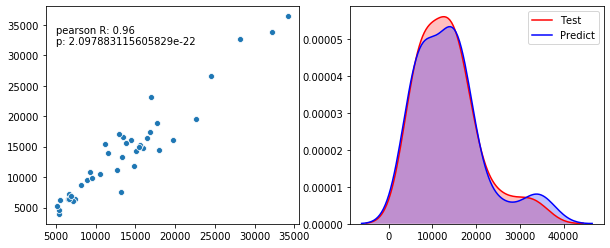

In [41]:
r = scipy.stats.pearsonr(y_test, y_pred)
pearson_r = str(round(r[0],2))
pearson_p = str(r[1])

plt.figure(figsize= (10,4))
ax1 = plt.subplot(121)
sb.scatterplot(y_test, y_pred)
plt.text(5000, 35000, 'pearson R: '+ pearson_r + '\np: ' + pearson_p, va = 'top')

ax2 = plt.subplot(122)
sb.kdeplot(y_test, shade=True, color="r", legend=True, label = 'Test')
sb.kdeplot(y_pred, shade=True, color="b", legend=True, label = 'Predict')
plt.legend()

In [42]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print('Mean squared error:', MSE)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean absolute error:', MAE)

# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean squared error: 5351867.73854668
Mean absolute error: 1673.7104720300933
R2 score: 0.8903091058832202


In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.05, normalize = True)
ridge.fit(x_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [44]:
y_pred = ridge.predict(x_test)

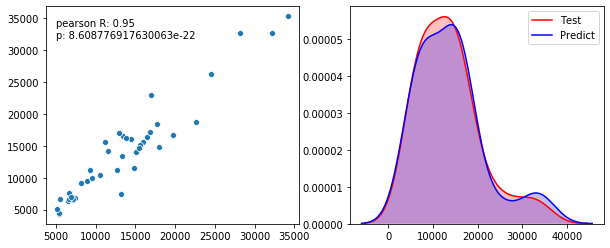

In [45]:
r = scipy.stats.pearsonr(y_test, y_pred)
pearson_r = str(round(r[0],2))
pearson_p = str(r[1])

plt.figure(figsize= (10,4))
ax1 = plt.subplot(121)
sb.scatterplot(y_test, y_pred)
plt.text(5000, 35000, 'pearson R: '+ pearson_r + '\np: ' + pearson_p, va = 'top')

ax2 = plt.subplot(122)
sb.kdeplot(y_test, shade=True, color="r", legend=True, label = 'Test')
sb.kdeplot(y_pred, shade=True, color="b", legend=True, label = 'Predict')
plt.legend()

In [46]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print('Mean squared error:', MSE)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean absolute error:', MAE)

# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean squared error: 5278611.341056254
Mean absolute error: 1629.6672397448438
R2 score: 0.8918105554954039


In [47]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.05, normalize = True)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
y_pred = lasso_model.predict(x_test)

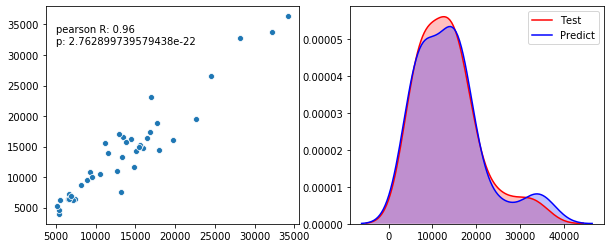

In [49]:
r = scipy.stats.pearsonr(y_test, y_pred)
pearson_r = str(round(r[0],2))
pearson_p = str(r[1])

plt.figure(figsize= (10,4))
ax1 = plt.subplot(121)
sb.scatterplot(y_test, y_pred)
plt.text(5000, 35000, 'pearson R: '+ pearson_r + '\np: ' + pearson_p, va = 'top')

ax2 = plt.subplot(122)
sb.kdeplot(y_test, shade=True, color="r", legend=True, label = 'Test')
sb.kdeplot(y_pred, shade=True, color="b", legend=True, label = 'Predict')
plt.legend()

In [50]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print('Mean squared error:', MSE)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean absolute error:', MAE)

# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean squared error: 5414054.110332918
Mean absolute error: 1680.1144872562581
R2 score: 0.8890345454762093


In [51]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet(alpha=0.01, l1_ratio=0.5, normalize=False)
enet_model.fit(x_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
y_pred = enet_model.predict(x_test)

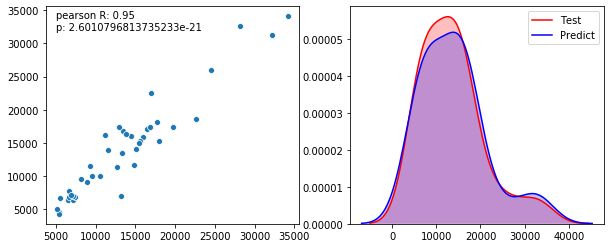

In [53]:
r = scipy.stats.pearsonr(y_test, y_pred)
pearson_r = str(round(r[0],2))
pearson_p = str(r[1])

plt.figure(figsize= (10,4))
ax1 = plt.subplot(121)
sb.scatterplot(y_test, y_pred)
plt.text(5000, 35000, 'pearson R: '+ pearson_r + '\np: ' + pearson_p, va = 'top')

ax2 = plt.subplot(122)
sb.kdeplot(y_test, shade=True, color="r", legend=True, label = 'Test')
sb.kdeplot(y_pred, shade=True, color="b", legend=True, label = 'Predict')
plt.legend()

In [54]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print('Mean squared error:', MSE)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean absolute error:', MAE)

# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean squared error: 5302976.4866081625
Mean absolute error: 1611.4289689444704
R2 score: 0.89131117196587


In [55]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor()
RandomForest.fit(x_train, y_train)

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
y_pred = RandomForest.predict(x_test)

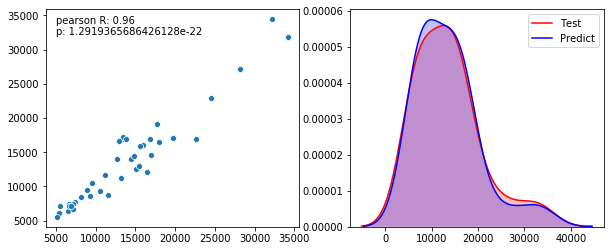

In [57]:
r = scipy.stats.pearsonr(y_test, y_pred)
pearson_r = str(round(r[0],2))
pearson_p = str(r[1])

plt.figure(figsize= (10,4))
ax1 = plt.subplot(121)
sb.scatterplot(y_test, y_pred)
plt.text(5000, 35000, 'pearson R: '+ pearson_r + '\np: ' + pearson_p, va = 'top')

ax2 = plt.subplot(122)
sb.kdeplot(y_test, shade=True, color="r", legend=True, label = 'Test')
sb.kdeplot(y_pred, shade=True, color="b", legend=True, label = 'Predict')
plt.legend()

In [58]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print('Mean squared error:', MSE)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean absolute error:', MAE)

# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean squared error: 4109996.574799308
Mean absolute error: 1521.0497755126805
R2 score: 0.9157622682153459
